# Learning Machines

## Stats 141B

## Lecture 11

## Prof. Sharpnack

## Lecture slides at http://anson.ucdavis.edu/~jsharpna/141Blectures/

## Lecture repository at https://github.com/jsharpna/141Blectures/

## Things that I would like to know

- Geographic location of different voters
- Political polarization
- Effect of 3rd party candidates
- Were the voting systems hacked

In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from scipy import stats
import numpy as np
# from mpl_toolkits.basemap import Basemap
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10,6)

### Quick look at the data
#### Precinct level data

In [4]:
OH = pd.read_csv('../data/OHvotes.csv')
OH.head()

,County Name,Precinct Name,Precinct Code,Region Name,Media Market,Registered Voters,Total Voters,Turnout Percentage,James Jerome Bell (WI)*,Michael Bickelmeyer (WI)*,...,Joseph Maldonado (WI)*,Michael Andrew Maturen (WI)*,Evan McMullin (WI)*,Monica Moorehead (WI)*,Joe Schriner (WI)*,Mike Smith (WI)*,Jill Stein (G),Josiah R. Stroh (WI)*,Douglas W. Thomson (WI)*,Donald J. Trump (R)
0,Adams,BRATTON TOWNSHIP,AAA,Southwest,Cincinnati,923,661,71.61%,0,0,...,0,0,0,0,0,0,4,0,0,532
1,Adams,BRUSH CREEK TOWNSHIP,AAB,Southwest,Cincinnati,768,514,66.93%,0,0,...,0,0,0,0,0,0,0,0,0,390
2,Adams,LOCUST GROVE,AAD,Southwest,Cincinnati,684,522,76.32%,0,0,...,0,0,0,0,0,0,4,0,0,408
3,Adams,GREEN TOWNSHIP,AAE,Southwest,Cincinnati,409,259,63.33%,0,0,...,0,0,0,0,0,0,1,0,0,176
4,Adams,JEFFERSON TOWNSHIP,AAG,Southwest,Cincinnati,537,351,65.36%,0,0,...,0,0,0,0,0,0,2,0,0,258


In [6]:
OH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8887 entries, 0 to 8886
Data columns (total 31 columns):
County Name                     8887 non-null object
Precinct Name                   8887 non-null object
Precinct Code                   8887 non-null object
Region Name                     8887 non-null object
Media Market                    8887 non-null object
Registered Voters               8887 non-null object
Total Voters                    8887 non-null object
Turnout Percentage              8887 non-null object
James Jerome Bell (WI)*         8887 non-null int64
Michael Bickelmeyer (WI)*       8887 non-null int64
Darrell L. Castle (WI)*         8887 non-null int64
Hillary Clinton (D)             8887 non-null object
Richard Duncan                  8887 non-null int64
Cherunda Fox (WI)*              8887 non-null int64
Ben Hartnell (WI)*              8887 non-null int64
Tom Hoefling (WI)*              8887 non-null int64
Bruce E. Jaynes (WI)*           8887 non-null int64


In [11]:
for val in OH['Hillary Clinton (D)']:
    try:
        int(val)
    except:
        print(val)

1,692
1,048
1,024
1,035
1,196
1,026


In [84]:
OH = pd.read_csv('../data/OHvotes.csv',thousands=',')
OH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8887 entries, 0 to 8886
Data columns (total 31 columns):
County Name                     8887 non-null object
Precinct Name                   8887 non-null object
Precinct Code                   8887 non-null object
Region Name                     8887 non-null object
Media Market                    8887 non-null object
Registered Voters               8887 non-null int64
Total Voters                    8887 non-null int64
Turnout Percentage              8887 non-null object
James Jerome Bell (WI)*         8887 non-null int64
Michael Bickelmeyer (WI)*       8887 non-null int64
Darrell L. Castle (WI)*         8887 non-null int64
Hillary Clinton (D)             8887 non-null int64
Richard Duncan                  8887 non-null int64
Cherunda Fox (WI)*              8887 non-null int64
Ben Hartnell (WI)*              8887 non-null int64
Tom Hoefling (WI)*              8887 non-null int64
Bruce E. Jaynes (WI)*           8887 non-null int64
Gar

In [85]:
OH = OH.set_index(['County Name','Precinct Name'])

In [86]:
OH.head()

Precinct Code Region Name Media Market  \
County Name Precinct Name                                                 
Adams       BRATTON TOWNSHIP               AAA   Southwest   Cincinnati   
            BRUSH CREEK TOWNSHIP           AAB   Southwest   Cincinnati   
            LOCUST GROVE                   AAD   Southwest   Cincinnati   
            GREEN TOWNSHIP                 AAE   Southwest   Cincinnati   
            JEFFERSON TOWNSHIP             AAG   Southwest   Cincinnati   

                                  Registered Voters  Total Voters  \
County Name Precinct Name                                           
Adams       BRATTON TOWNSHIP                    923           661   
            BRUSH CREEK TOWNSHIP                768           514   
            LOCUST GROVE                        684           522   
            GREEN TOWNSHIP                      409           259   
            JEFFERSON TOWNSHIP                  537           351   

                                 Turnout Percentage  James Jerome Bell (WI)*  \
County Name Precinct Name                                                      
Adams       BRATTON TOWNSHIP                 71.61%                        0   
            BRUSH CREEK TOWNSHIP             66.93%                        0   
            LOCUST GROVE                     76.32%                        0   
            GREEN TOWNSHIP                   63.33%                        0   
            JEFFERSON TOWNSHIP               65.36%                        0   

                                  Michael Bickelmeyer (WI)*  \
County Name Precinct Name                                     
Adams       BRATTON TOWNSHIP                              0   
            BRUSH CREEK TOWNSHIP                          0   
            LOCUST GROVE                                  0   
            GREEN TOWNSHIP                                0   
            JEFFERSON TOWNSHIP                            0   

                                  Darrell L. Castle (WI)*  \
County Name Precinct Name                                   
Adams       BRATTON TOWNSHIP                            0   
            BRUSH CREEK TOWNSHIP                        0   
            LOCUST GROVE                                0   
            GREEN TOWNSHIP                              0   
            JEFFERSON TOWNSHIP                          0   

                                  Hillary Clinton (D)         ...           \
County Name Precinct Name                                     ...            
Adams       BRATTON TOWNSHIP                       96         ...            
            BRUSH CREEK TOWNSHIP                   95         ...            
            LOCUST GROVE                           94         ...            
            GREEN TOWNSHIP                         76         ...            
            JEFFERSON TOWNSHIP                     73         ...            

                                  Joseph Maldonado (WI)*  \
County Name Precinct Name                                  
Adams       BRATTON TOWNSHIP                           0   
            BRUSH CREEK TOWNSHIP                       0   
            LOCUST GROVE                               0   
            GREEN TOWNSHIP                             0   
            JEFFERSON TOWNSHIP                         0   

                                  Michael Andrew Maturen (WI)*  \
County Name Precinct Name                                        
Adams       BRATTON TOWNSHIP                                 0   
            BRUSH CREEK TOWNSHIP                             0   
            LOCUST GROVE                                     0   
            GREEN TOWNSHIP                                   0   
            JEFFERSON TOWNSHIP                               0   

                                  Evan McMullin (WI)*  Monica Moorehead (WI)*  \
County Name Precinct Name                                                       

In [87]:
OH[['Registered Voters','Total Voters']].describe()

,Registered Voters,Total Voters
count,8887.000000,8887.000000
mean,884.553280,630.993699
std,283.843033,218.134518
min,2.000000,2.000000
25%,697.500000,476.000000
50%,874.000000,623.000000
75%,1055.000000,770.000000
max,3586.000000,2434.000000


In [88]:
candidates = OH.columns.values[9:]
OH['No Pres'] = OH['Total Voters'] - OH[candidates].sum(axis=1)
candidates = candidates.tolist() + ['No Pres']

In [89]:
totals = OH[candidates].sum()
total_percs = totals / totals.sum()
total_percs

Hillary Clinton (D)             0.426947
Richard Duncan                  0.004322
Cherunda Fox (WI)*              0.000000
Ben Hartnell (WI)*              0.000000
Tom Hoefling (WI)*              0.000000
Bruce E. Jaynes (WI)*           0.000000
Gary Johnson                    0.031118
Chris Keniston (WI)*            0.000000
Barry Kirschner (WI)*           0.000000
Laurence Kotlikoff (WI)*        0.000000
Joseph Maldonado (WI)*          0.000000
Michael Andrew Maturen (WI)*    0.000000
Evan McMullin (WI)*             0.000000
Monica Moorehead (WI)*          0.000000
Joe Schriner (WI)*              0.000000
Mike Smith (WI)*                0.000000
Jill Stein (G)                  0.008251
Josiah R. Stroh (WI)*           0.000000
Douglas W. Thomson (WI)*        0.000000
Donald J. Trump (R)             0.506631
No Pres                         0.022731
dtype: float64

In [90]:
total_percs[total_percs > 0.001]

Hillary Clinton (D)    0.426947
Richard Duncan         0.004322
Gary Johnson           0.031118
Jill Stein (G)         0.008251
Donald J. Trump (R)    0.506631
No Pres                0.022731
dtype: float64

In [91]:
keep_cols = ['Total Voters','Registered Voters'] + total_percs[total_percs > 0.001].index.values.tolist()
OH = OH[keep_cols]
OH.sum()

Total Voters           5607641
Registered Voters      7861025
Hillary Clinton (D)    2394164
Richard Duncan           24235
Gary Johnson            174498
Jill Stein (G)           46271
Donald J. Trump (R)    2841005
No Pres                 127468
dtype: int64

In [92]:
OH.sum()['Total Voters'] / OH.sum()['Registered Voters']

0.71334730521783096

In [94]:
OH_percs = OH[keep_cols].transform(lambda x: x / OH['Total Voters'])
OH = OH.join(OH_percs,rsuffix=" %age")

In [95]:
OH.head()

Total Voters  Registered Voters  \
County Name Precinct Name                                           
Adams       BRATTON TOWNSHIP               661                923   
            BRUSH CREEK TOWNSHIP           514                768   
            LOCUST GROVE                   522                684   
            GREEN TOWNSHIP                 259                409   
            JEFFERSON TOWNSHIP             351                537   

                                  Hillary Clinton (D)  Richard Duncan  \
County Name Precinct Name                                               
Adams       BRATTON TOWNSHIP                       96               4   
            BRUSH CREEK TOWNSHIP                   95               5   
            LOCUST GROVE                           94               2   
            GREEN TOWNSHIP                         76               2   
            JEFFERSON TOWNSHIP                     73               1   

                                  Gary Johnson  Jill Stein (G)  \
County Name Precinct Name                                        
Adams       BRATTON TOWNSHIP                12               4   
            BRUSH CREEK TOWNSHIP             9               0   
            LOCUST GROVE                     5               4   
            GREEN TOWNSHIP                   2               1   
            JEFFERSON TOWNSHIP               8               2   

                                  Donald J. Trump (R)  No Pres  \
County Name Precinct Name                                        
Adams       BRATTON TOWNSHIP                      532       13   
            BRUSH CREEK TOWNSHIP                  390       15   
            LOCUST GROVE                          408        9   
            GREEN TOWNSHIP                        176        2   
            JEFFERSON TOWNSHIP                    258        9   

                                  Total Voters %age  Registered Voters %age  \
County Name Precinct Name                                                     
Adams       BRATTON TOWNSHIP                    1.0                1.396369   
            BRUSH CREEK TOWNSHIP                1.0                1.494163   
            LOCUST GROVE                        1.0                1.310345   
            GREEN TOWNSHIP                      1.0                1.579151   
            JEFFERSON TOWNSHIP                  1.0                1.529915   

                                  Hillary Clinton (D) %age  \
County Name Precinct Name                                    
Adams       BRATTON TOWNSHIP                      0.145234   
            BRUSH CREEK TOWNSHIP                  0.184825   
            LOCUST GROVE                          0.180077   
            GREEN TOWNSHIP                        0.293436   
            JEFFERSON TOWNSHIP                    0.207977   

                                  Richard Duncan %age  Gary Johnson %age  \
County Name Precinct Name                                                  
Adams       BRATTON TOWNSHIP                 0.006051           0.018154   
            BRUSH CREEK TOWNSHIP             0.009728           0.017510   
            LOCUST GROVE                     0.003831           0.009579   
            GREEN TOWNSHIP                   0.007722           0.007722   
            JEFFERSON TOWNSHIP               0.002849           0.022792   

                                  Jill Stein (G) %age  \
County Name Precinct Name                               
Adams       BRATTON TOWNSHIP                 0.006051   
            BRUSH CREEK TOWNSHIP             0.000000   
            LOCUST GROVE                     0.007663   
            GREEN TOWNSHIP                   0.003861   
            JEFFERSON TOWNSHIP               0.005698   

                                  Donald J. Trump (R) %age  No Pres %age  
County Name Precinct Name                                                 
Adams       BRATTON TOWNSHIP            

### Obervations for OH 2016

- 8887 Precinct with average 631 voters
- 50.6% of voters voted for Trump, 42.7% for Hillary
- 5.6 Mill people voted, 71.3% of registered voters
- Third party and independent candidates are 
 - Gary Johnson: 3.1%
 - Jill Stein: 0.83%
 - Richard Duncan: 0.43%
- 2.3% of those that vote did not vote for president

### Further questions
- Geographic location of different voters
- Political polarization
- Effect of 3rd party candidates
- Were the voting systems hacked?

In [97]:
OH['swing'] = (OH['Donald J. Trump (R)'] - OH['Hillary Clinton (D)']) / OH['Total Voters']
OH['swing_cat'] = pd.qcut(OH['swing'],3)
OH['reg_cat'] = pd.qcut(OH['Registered Voters'],3)

In [103]:
swing_reg = pd.pivot_table(OH,values='Total Voters', index='reg_cat',columns='swing_cat',aggfunc='sum')
swing_reg

swing_cat,"(-0.986, -0.00521]","(-0.00521, 0.318]","(0.318, 1.0]"
reg_cat,,,
"(1.999, 764.0]",273696,388116,584333
"(764.0, 983.0]",639908,669252,549580
"(983.0, 3586.0]",953682,909807,639267


In [104]:
stats.chi2_contingency(swing_reg)

(196884.74580958669,
 0.0,
 4,
 array([[ 414953.29541781,  437150.89649551,  394040.80808668],
        [ 618941.04484221,  652050.81058149,  587748.1445763 ],
        [ 833391.65973999,  877973.292923  ,  791391.04733702]]))

In [23]:
#candidates = [u'Hillary Clinton (D)',u'Gary Johnson',u'Jill Stein (G)',u'Donald J. Trump (R)']
OHred = OH[['County Name','Registered Voters','Total Voters']+candidates]
OHcounties = OHred.groupby('County Name').sum()

OHcounties.head()

,Registered Voters,Total Voters,Hillary Clinton (D),Gary Johnson,Jill Stein (G),Donald J. Trump (R)
County Name,,,,,,
Adams,16945,11583,2326,226,47,8659
Allen,68054,46735,13294,1486,323,30487
Ashland,35452,25104,5740,906,185,17493
Ashtabula,60624,41797,15577,1213,427,23318
Athens,45418,30042,16370,1012,539,11354


In [24]:
OHcounties.describe()

,Registered Voters,Total Voters,Hillary Clinton (D),Gary Johnson,Jill Stein (G),Donald J. Trump (R)
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,89329.829545,63723.193182,27206.409091,1982.931818,525.806818,32284.147727
std,150403.755603,105847.643183,62649.313092,3091.387639,986.169448,38397.047518
min,8117.000000,5662.000000,1221.000000,152.000000,34.000000,3883.000000
25%,23903.000000,16844.000000,3774.500000,503.750000,103.000000,11422.250000
50%,35969.000000,26353.000000,7561.000000,899.000000,193.000000,17801.000000
75%,83708.000000,57768.500000,19008.750000,1851.500000,518.000000,35551.250000
max,890626.000000,617350.000000,398271.000000,19725.000000,6106.000000,199331.000000


In [43]:
OHsum = OHcounties.sum()
(OHsum / OHsum['Total Voters'])

Registered Voters      1.401842
Total Voters           1.000000
Hillary Clinton (D)    0.426947
Gary Johnson           0.031118
Jill Stein (G)         0.008251
Donald J. Trump (R)    0.506631
TMP                    0.000005
dtype: float64

We see that 42.7% went for Clinton and 50.7% for Trump, the third party candidates recieved 3.1% for Johnson and 0.8% for Stein.  We can see that the third party candidates were not decisive for the OH election decision.

## County level analysis of the election results

- Where did people vote for Trump/Clinton?
- What are the population densities?

In [26]:
DbeatsH = OHcounties['Donald J. Trump (R)'] > OHcounties['Hillary Clinton (D)']
d,h = OHcounties[DbeatsH]['Registered Voters'].mean(), OHcounties[~DbeatsH]['Registered Voters'].mean()
OHcounties['TMP'] = (OHcounties['Donald J. Trump (R)'] - OHcounties['Hillary Clinton (D)']) / OHcounties['Total Voters']
print('Mean registered voters in Trumpland ' + str(d))
print('Mean registered voters in Clintonland ' + str(h))
print('Ratio (Clinton/Trump): ' + str(h/d))

Mean registered voters in Trumpland 55837.0625
Mean registered voters in Clintonland 424257.5
Ratio (Clinton/Trump): 7.598134303716281


- Trumpland = More Trump voters than Clinton voters
- Mean registered voters in Trumpland 55837.0625
- Mean registered voters in Clintonland 424257.5
- Ratio (Clinton/Trump): 7.598134303716281

At the county level, the mean number of registered voters is about 89 thousand.  We report the mean number of registered voters in counties that went for Clinton vs. Trump.  From these simple statistics we see the disproportionate effect of urban areas versus rural areas.  Of those counties that voted for Clinton over Trump, the average number of registered voters is 424,000, nearly 8 times this number for Trump leaning counties.

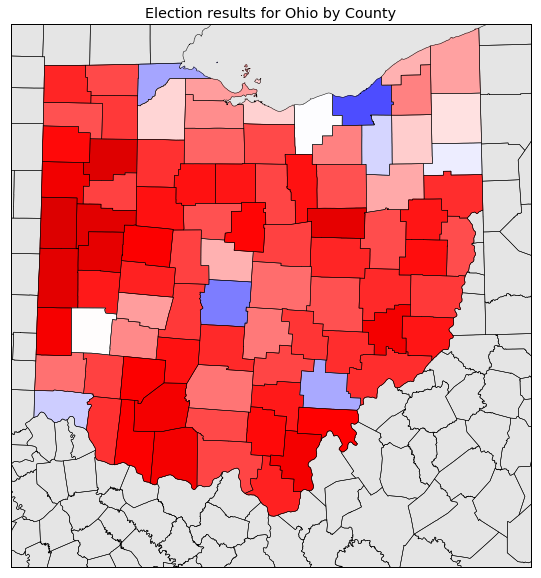

In [30]:
cmap = plt.cm.seismic

matplotlib.rcParams['figure.figsize'] = (10,10)
m = Basemap(llcrnrlon=-85,llcrnrlat=38,urcrnrlon=-80,urcrnrlat=42,
             projection='lcc',lat_1=39,lat_2=41,lon_0=-82.5)

m.drawmapboundary()
m.readshapefile('data/cb_2016_us_county_500k','counties',drawbounds=True)

OHcnames = [(i,c['NAME']) for i,c in enumerate(m.counties_info) if c['STATEFP'] == '39']

ax = plt.gca()

for i,c in OHcnames:
    ccol = rgb2hex(cmap((OHcounties['TMP'].loc[c] + 1)/2)[:3])
    seg = m.counties[i]
    poly = Polygon(seg,facecolor=ccol,edgecolor=ccol)
    ax.add_patch(poly)

ax.set_title('Election results for Ohio by County')    
plt.show()
matplotlib.rcParams['figure.figsize'] = (10,6)

Above we see a chloropleth map of the Clinton-Trump swing at the county level in Ohio (red means more Trump votes).  As we can see the democratic voters are concentrated in the major urban areas of Cincinnati, Columbus, Cleveland, and also in Athens OH (Ohio U).  The rural areas are heavily red.  We will explore the effect of population density on the vote percentages.

We can see how chloropleth maps can be misleading, because even though the map looks to be overwhelmingly red, Clinton did recieve 43.7% of the vote to Trump's 50.7%.

$$
\textrm{Small county} = \textrm{Less than 50,000 registered voters}
$$

$$
\textrm{Percent swing} = \frac{\textrm{Trump votes - Clinton votes}}{\textrm{Total Votes}} 
$$

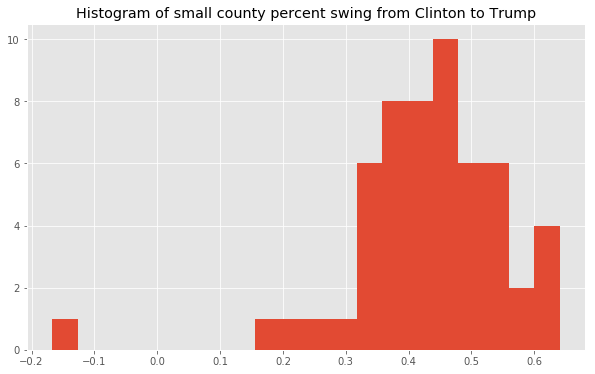

In [13]:
smallcounties = OHcounties['Registered Voters'] < 50000
plt.hist(OHcounties[smallcounties]['TMP'],bins=20)
plt.title('Histogram of small county percent swing from Clinton to Trump')
plt.show()

In [46]:
Ath = OHcounties[smallcounties][OHcounties[smallcounties]['TMP'] < -.1]
Ath.iloc[:,0:4]

,Registered Voters,Total Voters,Hillary Clinton (D),Gary Johnson
County Name,,,,
Athens,45418,30042,16370,1012


In [47]:
Ath.iloc[:,4:]

,Jill Stein (G),Donald J. Trump (R),TMP
County Name,,,
Athens,539,11354,-0.166966


In [49]:
Ath.iloc[:,0:-1] / Ath['Total Voters'][0]

,Registered Voters,Total Voters,Hillary Clinton (D),Gary Johnson,Jill Stein (G),Donald J. Trump (R)
County Name,,,,,,
Athens,1.511817,1.0,0.544904,0.033686,0.017942,0.377938


### What does Trumpland look like in OH? 

In [16]:
OHcounties[smallcounties][OHcounties[smallcounties]['TMP'] > .6]

,Registered Voters,Total Voters,Hillary Clinton (D),Gary Johnson,Jill Stein (G),Donald J. Trump (R),TMP
County Name,,,,,,,
Auglaize,31666,24019,3980,701,112,18658,0.611100
Darke,34063,25821,4470,649,149,20012,0.601913
Mercer,28731,22053,3384,562,110,17506,0.640366
Putnam,23507,19161,2922,638,72,14961,0.628307


The histogram shows the percent swing from Clinton to Trump at the county level for counties with fewer than 50 thousand registered voters.  So only one small county is deeply blue, Athens, which is the home of the Ohio University.  In other small counties, especially the Auglaize, Darke, Mercer, and Putnam counties a massive swing occured for Trump, over 4 times the number of Clinton voters. 

In [17]:
# OHcounties['TrPerc'] = OHcounties['Donald J. Trump (R)'] / OHcounties['Total Voters']
# OHcounties['logitTP'] = OHcounties['TrPerc'].map(lambda p: np.log(p / (1-p)))

In [18]:
OHred.head()

,County Name,Registered Voters,Total Voters,Hillary Clinton (D),Gary Johnson,Jill Stein (G),Donald J. Trump (R)
0,Adams,923,661,96,12,4,532
1,Adams,768,514,95,9,0,390
2,Adams,684,522,94,5,4,408
3,Adams,409,259,76,2,1,176
4,Adams,537,351,73,8,2,258


In [19]:
OHarea = pd.read_excel('data/OHarea.xlsx')
OHarea = OHarea.set_index('County')
OHarea.columns = ['Area']

In [20]:
candperc = pd.DataFrame({c : OH[c] / OH[u'Total Voters'] for c in candidates})
candperc[['County Name','Precinct Name','Total Voters']] = OH[['County Name','Precinct Name','Total Voters']]
candperc = candperc.set_index(['County Name','Precinct Name'])

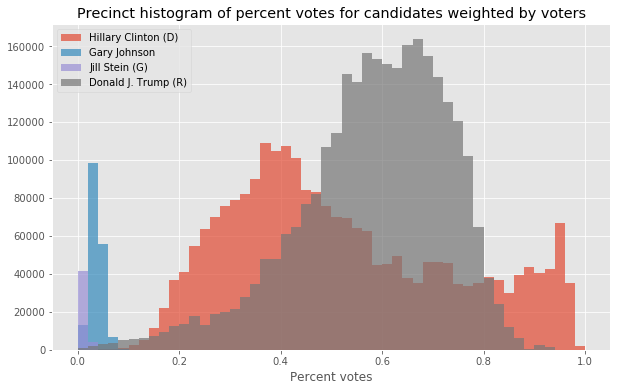

In [21]:
for c in candidates:
    plt.hist(candperc[c],alpha=.7,label=c,bins=50,range=(0,1),normed=0,weights=OH[c])
plt.legend(loc=2)
plt.title('Precinct histogram of percent votes for candidates weighted by voters')
plt.xlabel('Percent votes')
plt.show()

The histogram of precincts, weighted by number of voters (y-axis), for each of the four most popular candidates.  You should interpret this to mean that in a given bin, the total number of voters in precincts with that range of swing is the height of the bar.

In [22]:
def comp_cands(c0,c1):
    """Scatter plot comparing candidates"""
    plt.scatter(candperc[c0],candperc[c1],c='b',s = OH['Total Voters']/50,edgecolors='white')
    plt.xlabel(c0)
    plt.ylabel(c1)
    plt.title("The precinct level relationship between percent votes for candidates")
    plt.show()

### Third Party Candidates 

- What was the effect by third party candidates?
- How strong is this effect?

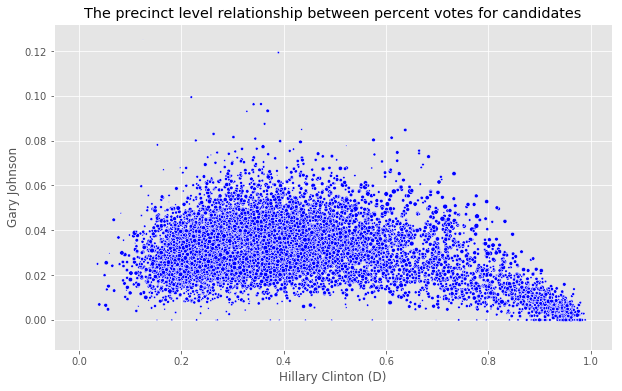

In [23]:
comp_cands(candidates[0], candidates[1])

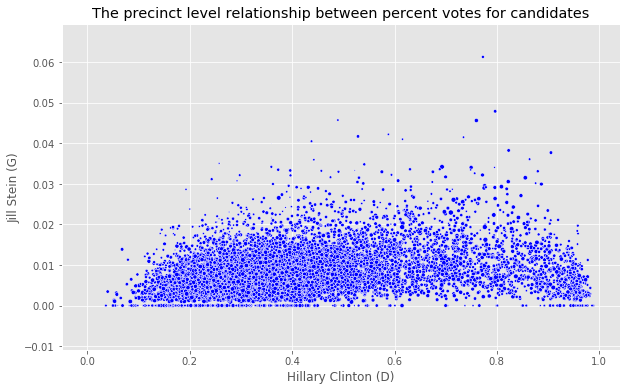

In [24]:
comp_cands(candidates[0], candidates[2])

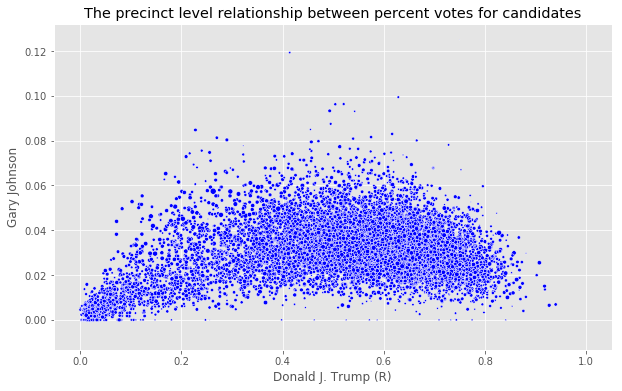

In [25]:
comp_cands(candidates[3], candidates[1])

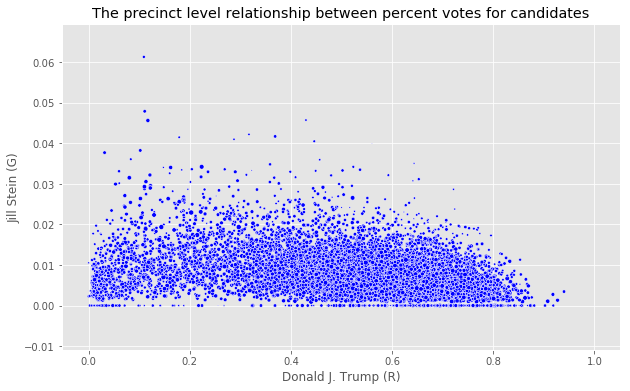

In [26]:
comp_cands(candidates[3], candidates[2])

### How do we measure association when there is some strange relationship?

- Correlation is not good enough; it assumes that there is a linear relationship
- Instead think of comparisons between two randomly chosen precincts:  When the 3rd party candidate vote increases, does the Clinton vote increase or decrease? This forms the Tau statistic.

In [27]:
taus = pd.DataFrame([[stats.kendalltau(candperc[candperc['Total Voters'] > 100][c0],candperc[candperc['Total Voters'] > 100][c1])[0] for c0 in candidates] for c1 in candidates])
taus = taus.rename({i:candidates[i] for i in range(4)})
taus = taus.rename(columns = {i:candidates[i] for i in range(4)})
taus

,Hillary Clinton (D),Gary Johnson,Jill Stein (G),Donald J. Trump (R)
Hillary Clinton (D),1.000000,-0.117957,0.206878,-0.942552
Gary Johnson,-0.117957,1.000000,0.099360,0.075659
Jill Stein (G),0.206878,0.099360,1.000000,-0.227611
Donald J. Trump (R),-0.942552,0.075659,-0.227611,1.000000


The above plots demonstrate the complicated relationships between the percent votes by precinct for each candidate.  It is not exactly obvious what the form of the dependencies are, and they do not seem to follow simple linear relationships.  The Kendall's tau statistic is a non-parametric measure of dependency (above).  It suggests that Johnson votes and Trump votes are positively associated, while Stein and Clinton votes are positively associated.  Clinton and Trump are highly negatively correlated, unsurprisingly.

## Causal effects of voting systems on Clinton-Trump swing

There was serious public concern about the hacking of certain voting system.  Particularly, voting systems such as the Accuvote TS are touch screens that runs off of Windows CE and maintain the votes in memory.  These have been noted to be vunerable, as could any voting systems where a computer is involved (including optical scanners).  I am interested to see if there is evidence in the voting record of widespread hacking.

In [51]:
OHmachine = pd.read_excel('data/OHmachines.xlsx',type='category',header=None)
OHmachine = OHmachine.rename(columns = {0:"County Name", 1:"System"})
OHmachine = OHmachine.set_index("County Name")

In [52]:
OHmachine.head()

,System
County Name,
Williams,Hart eScan
Defiance,Premier AccuVote-TSX
Paulding,Premier AccuVote-TSX
Van Wert,Premier AccuVote
Mercer,Premier AccuVote-TSX


In [53]:
OHmachine['System'] = OHmachine['System'].map(lambda s: s.strip())

In [54]:
OHcomach = OHcounties.join(OHmachine)

In [55]:
machsum = OHcomach.groupby('System').sum()

In [56]:
machsum['TMP'] = (machsum['Donald J. Trump (R)'] - machsum['Hillary Clinton (D)']) / machsum['Total Voters']

In [59]:
machsum.iloc[:,[1,2,5,6]]

,Total Voters,Hillary Clinton (D),Donald J. Trump (R),TMP
System,,,,
** Multiple ES&S Optical Scanners **,24019,3980,18658,0.611100
Dominion,81274,22024,53877,0.391921
ES&S DS200,974458,530490,386564,-0.147699
ES&S Model 100,991172,355018,569260,0.216150
ES&S iVotronic,914044,465585,382446,-0.090957
Hart eScan,435126,220077,185604,-0.079225
Premier AccuVote,45575,11829,31019,0.421064
Premier AccuVote-TSX,2130319,783373,1204857,0.197850
Unisyn OpenElect,11654,1788,8720,0.594817


### Does this mean that the election was hacked?

- Percent swing is highly dependent on election system!
- but, but, but so is total number of voters

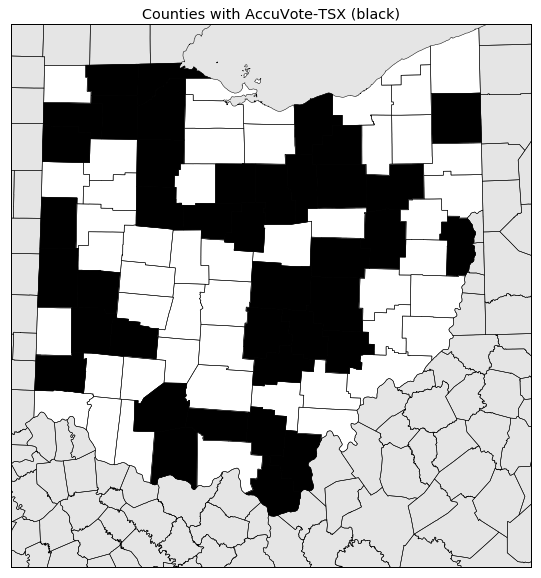

In [60]:
from mpl_toolkits.basemap import Basemap
cmap = plt.cm.Greys

matplotlib.rcParams['figure.figsize'] = (10,10)
m = Basemap(llcrnrlon=-85,llcrnrlat=38,urcrnrlon=-80,urcrnrlat=42,
             projection='lcc',lat_1=39,lat_2=41,lon_0=-82.5)

m.drawmapboundary()
m.readshapefile('data/cb_2016_us_county_500k','counties',drawbounds=True)
ax = plt.gca()

for i,c in OHcnames:
    istsx = 1.*(OHcomach['System'].loc[c] == 'Premier AccuVote-TSX')
    ccol = rgb2hex(cmap(istsx)[:3])
    seg = m.counties[i]
    poly = Polygon(seg,facecolor=ccol,edgecolor=ccol)
    ax.add_patch(poly)

plt.title('Counties with AccuVote-TSX (black)')
plt.show()
matplotlib.rcParams['figure.figsize'] = (10,6)

The above table demonstrates that the Clinton-Trump swing is highly associated with the voting system, where the swing is almost 20% for the Accuvote-TSX in Trump's favor, and almost 15% for the DS200 in Clinton's favor.  This is especially concerning because the DS200 is an optical scanner with paper ballots while the Accuvote is all electronic.

Looking at the above county map for the Accuvote can provide a benign explanation.  The Accuvote TSX is used in many rural areas, and is not used in any of the major cities in Ohio.  Thus, the population density is a possible confounder.  We will attempt to correct for this and look again at the effect of voting system.

In [61]:
OHarea = pd.read_excel('data/OHarea.xlsx')
OHarea = OHarea.set_index('County')
OHarea.columns = ['Area']

In [62]:
OHarea.head()

,Area
County,
Adams,583.87
Allen,402.50
Ashland,422.95
Ashtabula,701.93
Athens,503.60


In [63]:
OHcomach = OHcomach.join(OHarea)

In [33]:
OH = pd.read_csv('data/OHvotes.csv')
OH.iloc[:,0:8].head()

,County Name,Precinct Name,Precinct Code,Region Name,Media Market,Registered Voters,Total Voters,Turnout Percentage,James Jerome Bell (WI)*
0,Adams,BRATTON TOWNSHIP,AAA,Southwest,Cincinnati,923,661,71.61%,0
1,Adams,BRUSH CREEK TOWNSHIP,AAB,Southwest,Cincinnati,768,514,66.93%,0
2,Adams,LOCUST GROVE,AAD,Southwest,Cincinnati,684,522,76.32%,0
3,Adams,GREEN TOWNSHIP,AAE,Southwest,Cincinnati,409,259,63.33%,0
4,Adams,JEFFERSON TOWNSHIP,AAG,Southwest,Cincinnati,537,351,65.36%,0


In [70]:
OHcomach['TVdensity'] = OHcomach['Total Voters'] / OHcomach['Area']

### Correcting for population density

- Need to get area to obtain total voters / sqr mile

In [71]:
OHcomach.iloc[:,[1,6,7,8,9]].head()

,Total Voters,TMP,System,Area,TVdensity
County Name,,,,,
Adams,11583,0.546750,Premier AccuVote-TSX,583.87,19.838320
Allen,46735,0.367883,ES&S Model 100,402.50,116.111801
Ashland,25104,0.468172,Premier AccuVote-TSX,422.95,59.354534
Ashtabula,41797,0.185205,ES&S Model 100,701.93,59.545824
Athens,30042,-0.166966,ES&S Model 100,503.60,59.654488


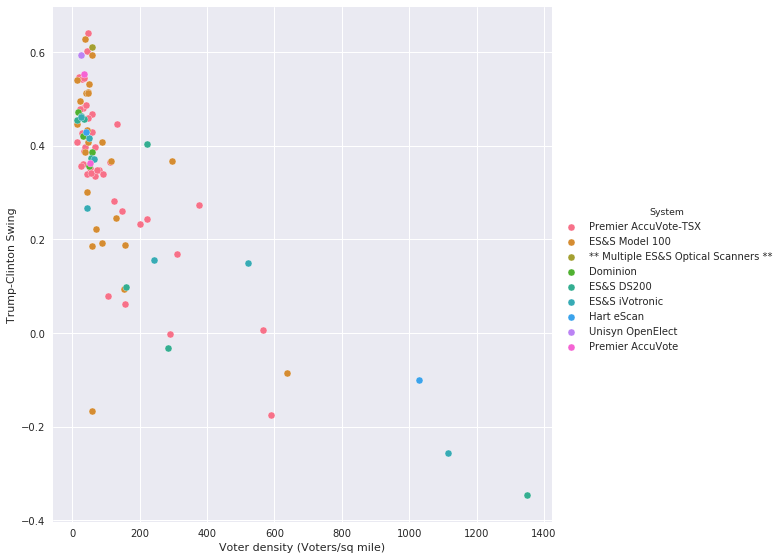

In [66]:
import seaborn as sns

sns.pairplot(x_vars=['TVdensity'], y_vars=['TMP'], data=OHcomach, hue='System', size=8)
plt.xlabel('Voter density (Voters/sq mile)')
plt.ylabel('Trump-Clinton Swing')
plt.show()

In [67]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=20)

y = np.array(OHcomach['TMP'])
X = np.array(OHcomach['TVdensity'])
X = X.reshape((X.shape[0],1))

knn.fit(X=X,y=y)
yhat = knn.predict(X = X)
OHcomach['TMPhat'] = yhat

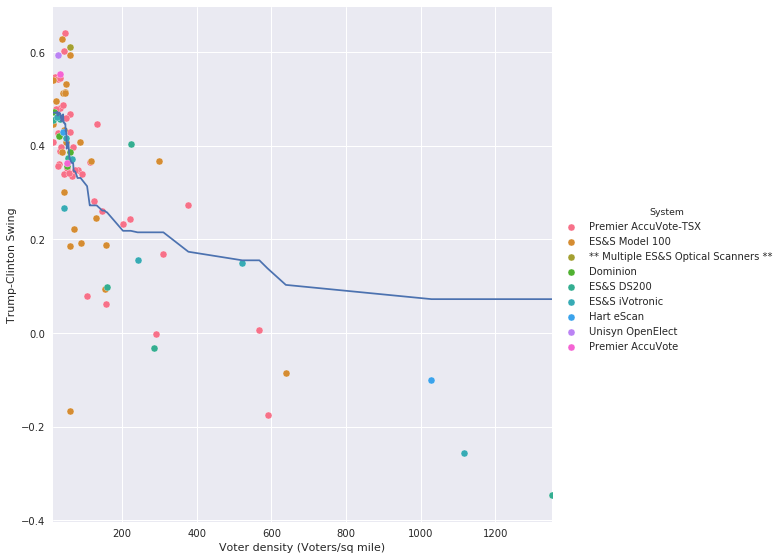

In [68]:
import seaborn as sns

sns_plot = sns.pairplot(x_vars=['TVdensity'], y_vars=['TMP'], data=OHcomach, hue='System', size=8)
fig = sns_plot.fig
OHcomach.sort_values('TVdensity').plot('TVdensity','TMPhat',ax=fig.axes[0],label='Prediction')
fig.axes[0].legend_.remove()
plt.xlabel('Voter density (Voters/sq mile)')
plt.ylabel('Trump-Clinton Swing')
#plt.legend()
plt.show()

In [81]:
OHcomach['TMChat'] = OHcomach['TMPhat'] * OHcomach['Total Voters']

In [82]:
OHbysys = OHcomach.groupby('System').sum()

In [84]:
OHbysys['TMPres'] = (OHbysys['Donald J. Trump (R)'] - OHbysys['Hillary Clinton (D)'] - OHbysys['TMChat'])/OHbysys['Total Voters']

In [85]:
OHbysys

,Registered Voters,Total Voters,Hillary Clinton (D),Gary Johnson,Jill Stein (G),Donald J. Trump (R),TMP,Area,TVdensity,TMPhat,TMChat,TMPres
System,,,,,,,,,,,,
** Multiple ES&S Optical Scanners **,31666,24019,3980,701,112,18658,0.611100,401.39,59.839558,0.372307,8942.437632,0.238793
Dominion,116945,81274,22024,2427,539,53877,1.635466,1948.22,161.653033,1.708535,33190.517657,-0.016457
ES&S DS200,1384850,974458,530490,23361,8076,386564,1.873570,3590.47,2151.324106,2.576347,139028.920128,-0.290372
ES&S Model 100,1357762,991172,355018,31124,7830,569260,8.334012,10656.00,2369.000369,8.964610,271255.088857,-0.057521
ES&S iVotronic,1261830,914044,465585,30920,8401,382446,1.568964,3231.89,2064.868022,2.166464,124785.627399,-0.227478
Hart eScan,605077,435126,220077,13903,3853,185604,0.328293,826.88,1070.419217,0.539953,38574.842589,-0.167877
Premier AccuVote,66054,45575,11829,1128,322,31019,0.915022,1019.37,86.010850,0.862035,18997.651226,0.004220
Premier AccuVote-TSX,3018903,2130319,783373,70560,17085,1204857,13.541425,18763.98,4517.032487,14.112946,553044.912488,-0.061756
Unisyn OpenElect,17938,11654,1788,374,53,8720,0.594817,422.53,27.581474,0.464723,5415.881284,0.130094


We fit a k-nearest neighbors regression to the Trump-Clinton swing variable, which allowed us to estimate the Trump-Clinton voter difference in each county conditional on the population density.  Then we were able to remove the prediction from the actual difference and look at that as a ratio of total votes.  Many of the effects were reversed after this correction, such as the Accuvote-TSX, which is now negatively associated with the voter swing even though before the correction it was positively associated.  Although, we are not formalizing this as a hypothesis test, I feel confident that there is little evidence from these observations of voting machine hacking. 

## Conclusions

- Trump vote in OH was primarily driven by rural areas
- The effects of third party candidates were significant but not strong (.1 - .2 tau association)
- No real evidence of election hacking in OH (once we correct for population density)

## Important ideas

- Knowing when to use what statistical tool
- Combining multiple data sources
- Knowing the computational tools needed and being very competent with linux, programming, open source tools

## My advice

- A computer is a tool
- School & University needs to be enjoyable but it is also a means to an end
- Becoming well rounded, intelligent, self-reliant is the ultimate goal

## Things to do right now

- Learn linux command line, start a personal website (learn html/css), learn to program in python
- Learn as much math, stats, computer science as you can
- Choose a project and do it: programming a video game, do a data analysis, make a simple web-app
- Read and write: read the news, read history, read science/tech magazines